In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import pickle

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Collab/temp.csv.zip")

In [ ]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [ ]:
df.drop("Date",axis=1,inplace=True)

In [ ]:
df.isna().sum()

,0
station,2
Present_Tmax,70
Present_Tmin,70
LDAPS_RHmin,75
LDAPS_RHmax,75
LDAPS_Tmax_lapse,75
LDAPS_Tmin_lapse,75
LDAPS_WS,75
LDAPS_LH,75
LDAPS_CC1,75


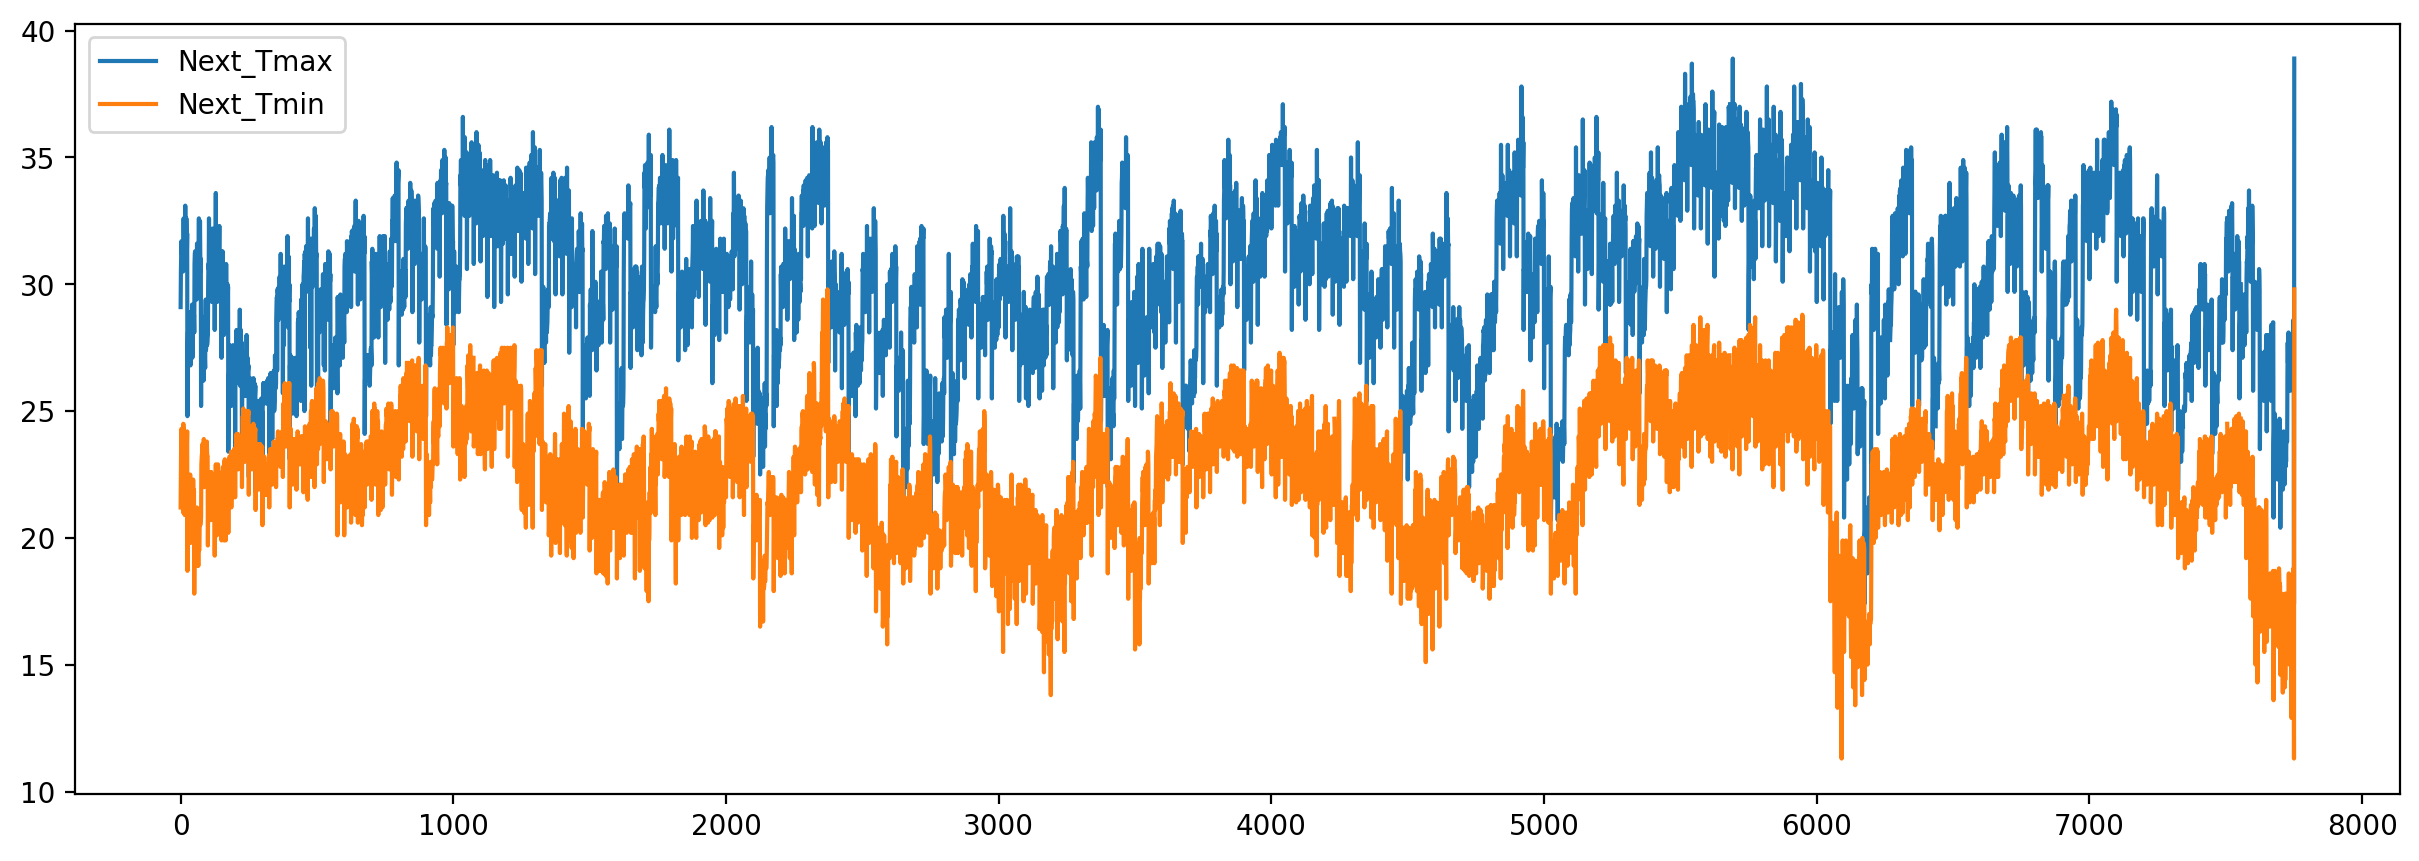

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5), dpi=200)
plt.plot(df["Next_Tmax"], label="Next_Tmax")
plt.plot(df["Next_Tmin"],label = "Next_Tmin")
plt.legend()
plt.show()

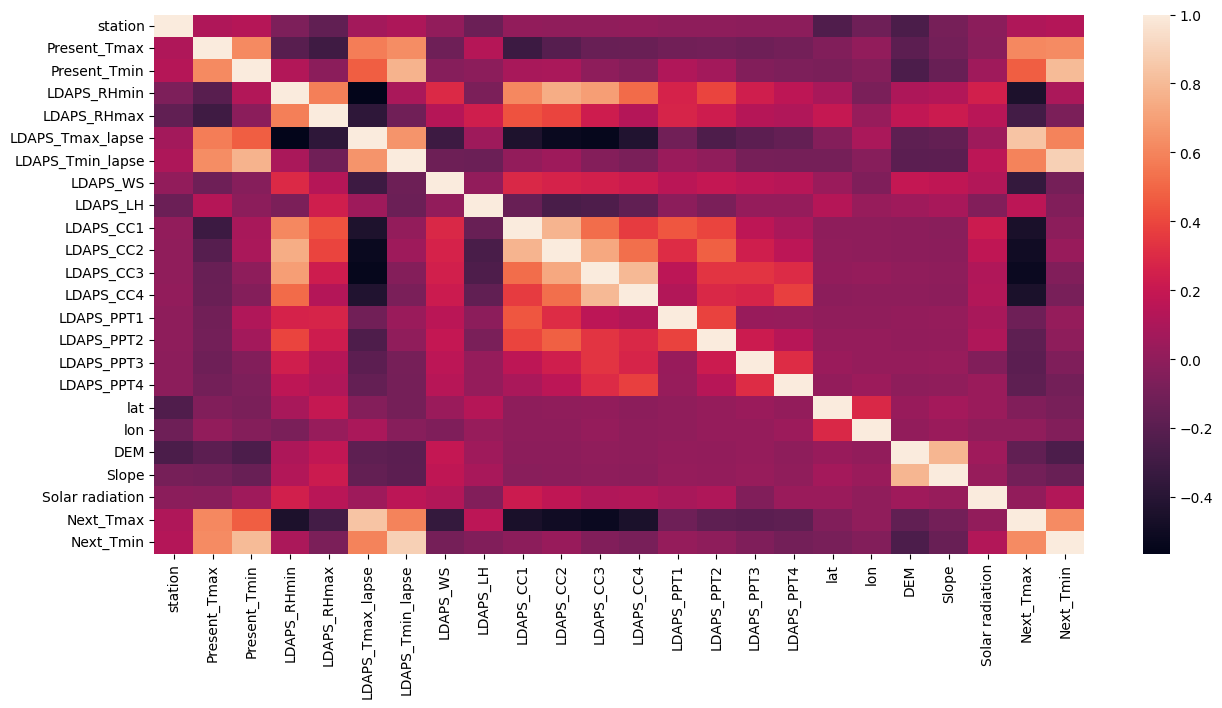

In [ ]:
cor = df.corr()
plt.figure(figsize=(15,7),dpi=100)
sns.heatmap(cor)
plt.show()

In [ ]:
df = df.dropna()
df.shape

(7588, 24)

In [ ]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [ ]:
train,test = train_test_split(df,test_size=0.2,random_state=0)

In [ ]:
test.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
1762,13.0,29.5,24.0,49.240719,89.921028,34.389545,24.601625,5.221017,88.933403,0.568819,...,0.000000,3.412338,0.769094,37.5776,127.083,59.8324,2.6865,5800.494629,33.6,25.4
7084,10.0,32.6,25.3,41.582893,81.946777,35.240291,26.001706,6.759760,82.979974,0.049609,...,0.000000,0.000000,0.000000,37.4562,126.955,208.5070,5.1782,5297.417969,35.4,24.5
6132,8.0,24.1,20.4,39.681465,77.433571,26.909984,17.867995,10.090204,69.809657,0.297910,...,0.000000,0.000000,0.000000,37.4697,126.910,52.5180,1.5629,4478.937012,27.1,19.2
1172,23.0,33.4,26.9,55.953552,91.107788,31.923643,27.142155,6.661125,89.106326,0.462394,...,0.354516,0.000000,0.000000,37.5372,126.891,15.5876,0.1554,4987.615723,34.1,27.0
298,24.0,25.6,24.6,87.433739,94.444557,25.066071,22.826700,8.913279,43.476780,0.817220,...,3.583352,5.172169,0.988621,37.5237,126.909,17.2956,0.2223,5758.557617,24.7,23.5


In [ ]:
def Xy(df):
    X = df.drop(["Next_Tmax","Next_Tmin"],axis=1)
    y_max = df["Next_Tmax"]
    y_min = df["Next_Tmin"]

    return X,y_max,y_min

In [ ]:
X_train, y_max_train, y_min_train = Xy(train)
X_test, y_max_test, y_min_test = Xy(test)

In [ ]:
y_min_train.head()

,Next_Tmin
1610,22.1
4048,26.9
1968,22.4
6937,24.8
2607,22.4


In [ ]:
max_model = LinearRegression()
max_model.fit(X_train, y_max_train)

LinearRegression()

In [ ]:
y_max_pred = max_model.predict(X_test)
max_model.score(X_test,y_max_test)

0.7922200591607402

In [ ]:
min_model = LinearRegression()
min_model.fit(X_train, y_min_train)

LinearRegression()

In [ ]:
y_min_pred = min_model.predict(X_test)
min_model.score(X_test,y_min_test)

0.8348312312471132

In [ ]:
pickle.dump(max_model, open('T_max.pkl','wb'))
pickle.dump(min_model, open('T_min.pkl', 'wb'))

In [ ]:

max_model = pickle.load(open('T_max.pkl', 'rb'))
min_model = pickle.load(open('T_min.pkl', 'rb'))

new_data = X_test.iloc[[2]]
print(new_data)
y_max_pred_new = max_model.predict(new_data)
y_min_pred_new = min_model.predict(new_data)

print("============ Weather Temparature Prediction (Using Max and Min Temparature) ===========")
print("Predicted Next_Tmax:", y_max_pred_new[0])
print("Predicted Next_Tmin:", y_min_pred_new[0])



NameError: name 'pickle' is not defined